In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [2]:
tab="data"

In [3]:
d1=pd.read_excel("C:/Users/Rehaman shaik/Desktop/data science practice session/assisgments/clustering/EastWestAirlines.xlsx",sheet_name=tab)
d1

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [4]:
d1.shape
x=d1.iloc[:,1:]
x

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [5]:
df=normalize(x)

In [6]:
d1=pd.DataFrame( df,columns=x.columns)

In [7]:
d1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.905810,0.0,0.000049,0.000049,0.000049,0.417949,0.000196,0.009805,0.000049,0.068784,0.000049
3995,0.999649,0.0,0.000016,0.000016,0.000016,0.015231,0.000078,0.000000,0.000000,0.021659,0.000016
3996,0.944948,0.0,0.000039,0.000013,0.000013,0.326726,0.000103,0.000000,0.000000,0.018001,0.000013
3997,0.999592,0.0,0.000018,0.000018,0.000018,0.009104,0.000018,0.009104,0.000018,0.025509,0.000000


In [8]:
 #hierarchical clustering

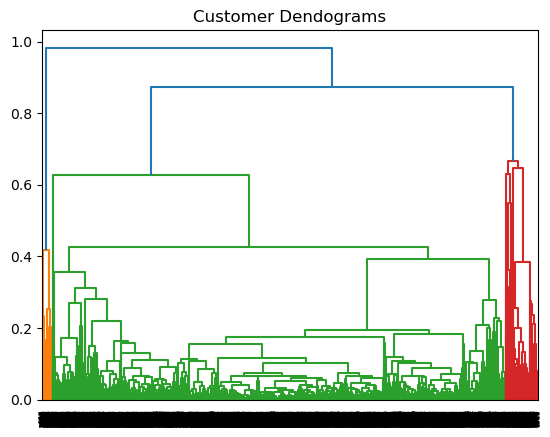

In [9]:
plt.title("Customer Dendograms")
dend=shc.dendrogram(shc.linkage(d1,method="average"))#due to large data set we cant decide the clusters by dendogram
plt.show()

In [10]:
## Forming a group using clusters

In [11]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
Y = cluster.fit_predict(x)
Y =pd.DataFrame(Y)
Y.value_counts()


C:\Users\Rehaman shaik\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


2    3961
1      33
0       5
Name: count, dtype: int64

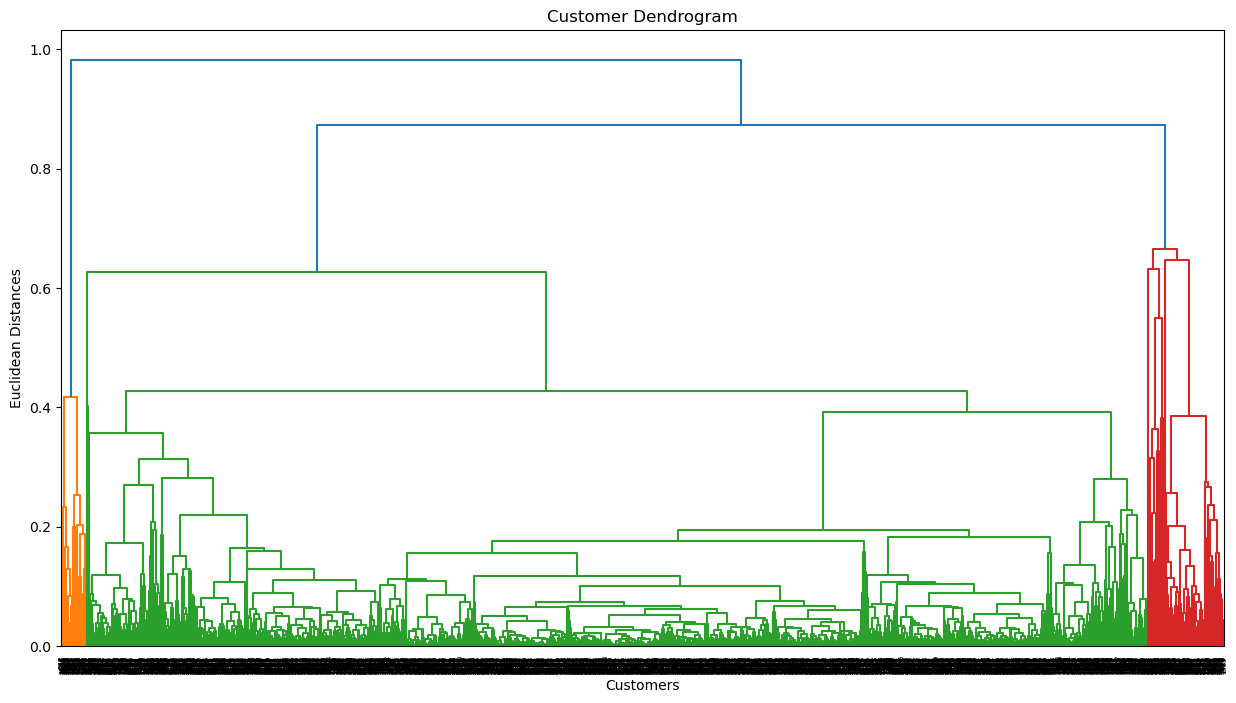

In [21]:
# Hierarchical Clustering Dendrogram
plt.figure(figsize=(15, 8))
plt.title("Customer Dendrogram")
dend = shc.dendrogram(shc.linkage(d1, method="average"))
plt.xlabel("Customers")
plt.ylabel("Euclidean Distances")
plt.show()


In [ ]:
'''The hierarchical clustering dendrogram shows the hierarchical relationship between customers based on the average linkage method.
The y-axis represents the Euclidean distances, and the vertical lines indicate the merging of clusters.'''

In [12]:
#kmeans
# Find the optimal number of clusters using the elbow method

In [13]:
wcss = []#inertia
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(x, kmeans.labels_))

C:\Users\Rehaman shaik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Rehaman shaik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Rehaman shaik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Rehaman shaik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

Text(0, 0.5, 'WCSS')

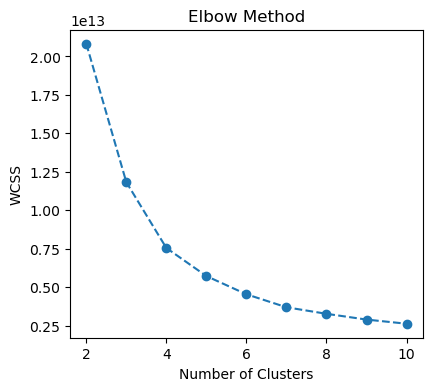

In [14]:
# Plot the elbow method graph
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

In [15]:
'''By seeing the above graph so it would be 5,6,7 so lets take n=5'''

'By seeing the above graph so it would be 5,6,7 so lets take n=5'

In [16]:
from sklearn.cluster import KMeans
KMeans = KMeans(n_clusters = 5, n_init=30)
KMeans.fit(x)
Y = KMeans.predict(x)
Y = pd.DataFrame(Y)
Y[0].value_counts()
KMeans.inertia_


5724556335991.398

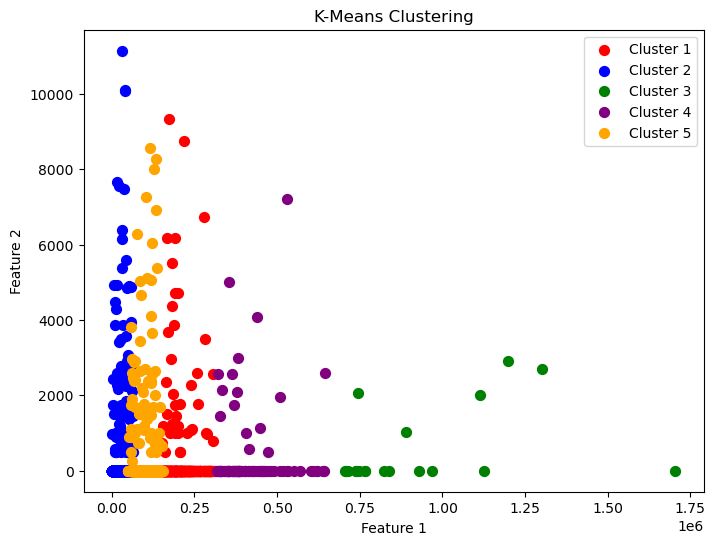

In [22]:
# Scatter plot for K-Means Clustering
plt.figure(figsize=(8, 6))
plt.scatter(x[Y[0] == 0].iloc[:, 0], x[Y[0] == 0].iloc[:, 1], s=50, c='red', label='Cluster 1')
plt.scatter(x[Y[0] == 1].iloc[:, 0], x[Y[0] == 1].iloc[:, 1], s=50, c='blue', label='Cluster 2')
plt.scatter(x[Y[0] == 2].iloc[:, 0], x[Y[0] == 2].iloc[:, 1], s=50, c='green', label='Cluster 3')
plt.scatter(x[Y[0] == 3].iloc[:, 0], x[Y[0] == 3].iloc[:, 1], s=50, c='purple', label='Cluster 4')
plt.scatter(x[Y[0] == 4].iloc[:, 0], x[Y[0] == 4].iloc[:, 1], s=50, c='orange', label='Cluster 5')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


In [ ]:
'''The elbow method suggests that the optimal number of clusters is around 5.
The scatter plot visualizes the clusters formed by K-Means, with points colored based on their assigned clusters.'''

In [17]:
#dbscan


In [40]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.70,min_samples=2)
dbscan.fit(x)
cl=pd.DataFrame(dbscan.labels_,columns=["cluster"])
cl.value_counts()
clustered=pd.concat([d1,cl],axis=1)
noise_data=clustered[clustered["cluster"]==-1]
final_data=clustered[clustered["cluster"]==0]


In [41]:
final_data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
3370,0.530714,0.0,0.000531,0.000531,0.000531,0.0,0.0,0.0,0.0,0.84755,0.0,0
3876,0.530714,0.0,0.000531,0.000531,0.000531,0.0,0.0,0.0,0.0,0.84755,0.0,0


In [42]:
noise_data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000,-1
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000,-1
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000,-1
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000,-1
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.905810,0.0,0.000049,0.000049,0.000049,0.417949,0.000196,0.009805,0.000049,0.068784,0.000049,-1
3995,0.999649,0.0,0.000016,0.000016,0.000016,0.015231,0.000078,0.000000,0.000000,0.021659,0.000016,-1
3996,0.944948,0.0,0.000039,0.000013,0.000013,0.326726,0.000103,0.000000,0.000000,0.018001,0.000013,-1
3997,0.999592,0.0,0.000018,0.000018,0.000018,0.009104,0.000018,0.009104,0.000018,0.025509,0.000000,-1
